In [ ]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Conv2D, Activation, MaxPool2D, LSTM
from tensorflow.keras.layers import BatchNormalization, Flatten, Reshape, Conv2DTranspose, LeakyReLU
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.models import Sequential
print("")

In [ ]:
## Seeding
np.random.seed(42)
tf.random.set_seed(42)

## Loading the dataset and then normalizing the images.
dataset = tf.keras.datasets.fashion_mnist
(x_train, y_train),(x_test, y_test) = dataset.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

## Hyperparameters
H = 28
W = 28
C = 1

## Latent space
latent_dim = 128

In [ ]:
## Building the autoencoder
inputs = Input(shape=(H, W, C), name="inputs")
x = inputs

x = Conv2D(32, (3, 3), padding="same")(x)
x = BatchNormalization()(x)
x = LeakyReLU(alpha=0.2)(x)
x = MaxPool2D((2, 2))(x)

x = Conv2D(64, (3, 3), padding="same")(x)
x = BatchNormalization()(x)
x = LeakyReLU(alpha=0.2)(x)
x = MaxPool2D((2, 2))(x)

x = Flatten()(x)
units = x.shape[1]
x = Dense(latent_dim, name="latent")(x)
x = Dense(units)(x)
x = LeakyReLU(alpha=0.2)(x)
x = Reshape((7, 7, 64))(x)

x = Conv2DTranspose(64, (3, 3), strides=2, padding="same")(x)
x = BatchNormalization()(x)
x = LeakyReLU(alpha=0.2)(x)

x = Conv2DTranspose(1, (3, 3), strides=2, padding="same")(x)
x = BatchNormalization()(x)
x = Activation("sigmoid", name="outputs")(x)

outputs = x
timesteps = 3

n_features = 2
autoencoder = Model(inputs, outputs)
autoencoder = LSTM(64, activation='relu', return_sequences=True))(autoencoder)
autoencoder.compile(optimizer=Adam(1e-3), loss='binary_crossentropy')
autoencoder.summary()

print(x_train.shape, x_test.shape)


In [26]:
model = Sequential()
model.add(LSTM(28, activation='relu', input_shape=(28, 28), return_sequences=True))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_24 (LSTM)              (None, 28, 28)            6384      
                                                                 
Total params: 6,384
Trainable params: 6,384
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.fit(
    x_train,
    x_train,
    epochs=1,
    batch_size=100,
    shuffle=False,
    validation_data=(x_test, x_test)
)

test_pred_y = model.predict(x_test)


600/600 [==============================] - 13s 19ms/step - loss: 0.0279 - val_loss: 0.0113


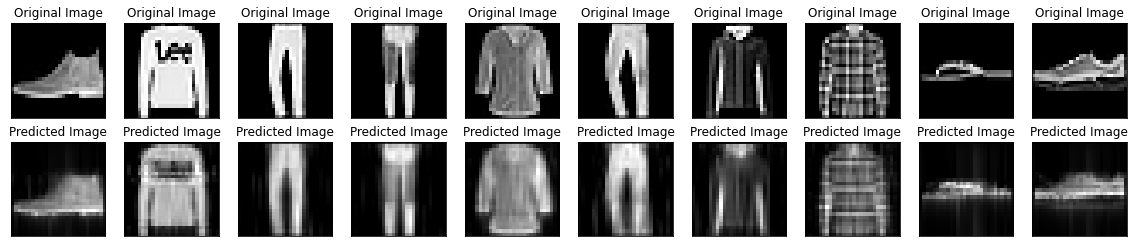

In [28]:
n = 10  ## how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    ## display original
    ax = plt.subplot(2, n, i + 1)
    ax.set_title("Original Image")
    plt.imshow(x_test[i].reshape(H, W))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ## display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    ax.set_title("Predicted Image")
    plt.imshow(test_pred_y[i].reshape(H, W))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.savefig("results/convolutonal_autoencoder.png")